# 1.导入包和数据预处理

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#检测文件目录
import os
print(os.listdir("../input/"))

['data.csv']


In [3]:
#读取数据
data = pd.read_csv("../input/data.csv",encoding="gb18030")

In [4]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [5]:
#数据形状
print(data.shape)

(4754, 90)


In [6]:
#每列数据个数
data.apply(pd.Series.nunique, axis=0)

Unnamed: 0                               4754
custid                                   4754
trade_no                                 4754
bank_card_no                                1
low_volume_percent                         40
middle_volume_percent                      90
take_amount_in_later_12_month_highest     166
trans_amount_increase_rate_lately         782
trans_activity_month                       84
trans_activity_day                        512
transd_mcc                                 41
trans_days_interval_filter                147
trans_days_interval                       114
regional_mobility                           5
student_feature                             2
repayment_capability                     2390
is_high_user                                2
number_of_trans_from_2011                  70
first_transaction_time                   1693
historical_trans_amount                  4524
historical_trans_day                      476
rank_trad_1_month                 

#  2.探索性数据分析（EDA）

## 2.1检测目标列分布

Number of not overdue:  3561
Number of overdue :  1193


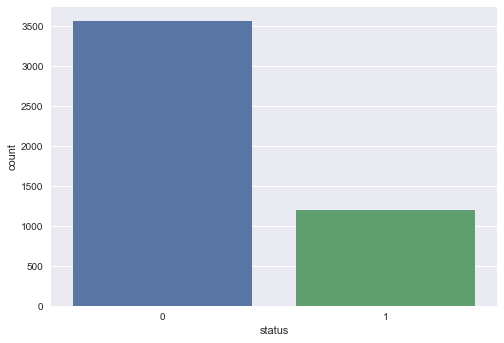

In [7]:
sns.countplot(data.status, label="Count")
N, Y = data.status.value_counts()
print('Number of not overdue: ',N)
print('Number of overdue : ',Y)

### 列类型

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [9]:
#列类型统计
data.dtypes.value_counts()

float64    70
int64      13
object      7
dtype: int64

In [10]:
#把数据分为object型和数值型
data_obj_ls=['trade_no',"bank_card_no",'reg_preference_for_trad', 'source',
                 'id_name', 'latest_query_time', 'loans_latest_time']
data_obj = data[data_obj_ls]
data_num = data.drop(data_obj_ls, axis=1)

In [11]:
# 去掉所有都不同和所有都相同的列
drop_list = ['trade_no','bank_card_no','source']
data_obj.drop(drop_list, axis=1, inplace=True)
# 去掉无关的列
data_obj.drop("id_name", axis=1, inplace=True)
# 为避免产生噪声，去掉缺失值比例过大的student_feature特征
data.drop("student_feature", axis=1, inplace=True)

In [12]:
data_obj.describe()

,reg_preference_for_trad,latest_query_time,loans_latest_time
count,4752,4450,4457
unique,5,207,232
top,一线城市,2018-04-14,2018-05-03
freq,3403,423,134


In [13]:
#每个object列中的唯一类数
data.describe(include=[np.object])

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507121256544000000388272864,卡号1,一线城市,xs,张龙,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


In [14]:
print(data.reg_preference_for_trad.value_counts())

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64


In [15]:
data_add_list = ["reg_preference_for_trad","latest_query_time","latest_query_time"]
data_add = data[data_add_list]
# data.drop([data_add_list], axis=1, inplace=True)

## 2.2 检测缺失值

In [16]:
# 按列计算缺失值
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # 按缺失降序的百分比对表进行排序
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # 输出主要信息
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # 返回缺失值的列表
        return mis_val_table_ren_columns

In [17]:
#缺失值统计
missing_values = missing_values_table(data)
missing_values.head(10)

Your selected dataframe has 89 columns.
There are 73 columns that have missing values.


,Missing Values,% of Total Values
cross_consume_count_last_1_month,426,9.0
query_cash_count,304,6.4
latest_six_month_apply,304,6.4
latest_one_month_apply,304,6.4
latest_query_time,304,6.4
query_sum_count,304,6.4
query_finance_count,304,6.4
query_org_count,304,6.4
apply_credibility,304,6.4
apply_score,304,6.4


In [19]:
#数值型缺失值处理
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean')
num = imputer.fit_transform(data_num)
data_num = pd.DataFrame(num, columns=data_num.columns)

In [23]:
#标签型型缺失值处理
data_obj.ffill(inplace=True)

## 2.3 数值处理

### 数值化
+ 标签编码（两个特征）
+ 独热编码（两个以上特征）

In [24]:
# # 标签编码
# le = LabelEncoder()
# le_count = 0

# # 列遍历
# for col in data:
#     if data[col].dtype == 'object':
#         if len(list(data[col].unique())) <= 2:
#             le.fit(data[col])
#             data[col] = le.transform(data[col])
#             le_count += 1
            
# print('%d columns were label encoded.' % le_count)

In [29]:
print(data_add.reg_preference_for_trad.shape)

(4754,)


In [26]:
print(len(data_add.reg_preference_for_trad.unique()))

6


In [22]:
# 处理 reg_preference_for_trad 特征
# 独热编码

oht_encoder = OneHotEncoder().fit(data_obj.reg_preference_for_trad)


ValueError: could not convert string to float: '一线城市'

In [ ]:
# 处理 latest_query_time 和 loans_latest_time 特征

data_obj['latest_query_time'] = pd.to_datetime(data_obj['latest_query_time'])
data_obj['latest_query_time_month'] = data_obj['latest_query_time'].dt.month
data_obj['latest_query_time_weekday'] = data_obj['latest_query_time'].dt.weekday

data_obj['loans_latest_time'] = pd.to_datetime(data_obj['loans_latest_time'])
data_obj['loans_latest_time_month'] = data_obj['loans_latest_time'].dt.month
data_obj['loans_latest_time_weekday'] = data_obj['loans_latest_time'].dt.weekday

data_obj = data_obj.drop(['latest_query_time', 'loans_latest_time'], axis=1)

In [ ]:
print(data_add.head())

## 2.3 异常值

In [ ]:
data.describe()

In [ ]:
#print(data.count())
#print(data.sum())

In [ ]:
#data.isnull()

# 3. 特征工程

In [ ]:
#切分数据，测试集30%，训练集70%，随机种子设置为2018
from sklearn.model_selection import train_test_split
random_state = 2018
train,test = train_test_split(data, test_size=0.3, random_state=random_state)
print("Training data shape: ", train.shape)
print("Tesing data shape: ", test.shape)